The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Loading the Data Set

In [4]:
#read train
train = pd.read_csv('C:/Users/user/Desktop/Justin_Github/Jan 4/sign_mnist_train.csv')
print(train.shape)

(27455, 785)


In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
#read test
test = pd.read_csv('C:/Users/user/Desktop/Justin_Github/Jan 4/sign_mnist_test.csv')
print(test.shape)

(7172, 785)


In [7]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
x_train = train.drop(labels = ["label"], axis = 1)
y_train = train["label"]
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)

x_train shape (27455, 784)
y_train shape (27455,)


In [9]:
x_test = test.drop(labels = ["label"], axis = 1)
y_test = test["label"]
print("x_test shape ", x_test.shape)
print("y_test shape", y_test.shape)

x_test shape  (7172, 784)
y_test shape (7172,)


Data Visualization and Preprocessing

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

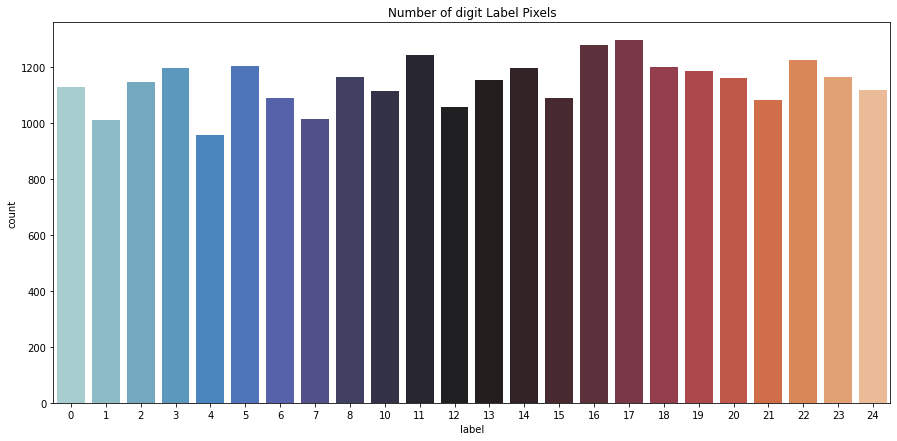

In [10]:
plt.figure(figsize = (15,7))
sns.countplot(y_train, palette= "icefire")
plt.title("Number of digit Label Pixels")
y_train.value_counts()

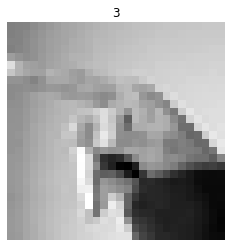

In [11]:
#plot some samples
img = x_train.iloc[41].values
img = img.reshape((28,28))
plt.imshow(img, cmap = "gray")
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

Normalization, Reshape and Label Encoding

In [12]:
#normalization
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (27455, 784)
x_test shape :  (7172, 784)


In [13]:
#Reshape
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (27455, 28, 28, 1)
x_test shape :  (7172, 28, 28, 1)


In [14]:
#label encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 25)
y_test =  to_categorical(y_test, num_classes = 25)

Train Test Split

In [15]:
#Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
print("x_train shape", x_train.shape)
print("x_val shape", x_val.shape)
print("y_train shape", y_train.shape)
print("y_val shape", y_val.shape)

x_train shape (24709, 28, 28, 1)
x_val shape (2746, 28, 28, 1)
y_train shape (24709, 25)
y_val shape (2746, 25)


Create Model

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(32, (3,3), strides = 1, padding = "Same",activation ="relu", input_shape =(28,28,1)))
model.add(MaxPool2D((2,2),strides = 2,padding ="Same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))



model.add(Conv2D(64, (3,3), strides = 1, padding = "Same",activation ="relu"))
model.add(MaxPool2D((2,2),strides = 2,padding ="Same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), strides = 1, padding = "Same",activation ="relu"))
model.add(MaxPool2D((2,2),strides = 2,padding ="Same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))



# fully connected

model.add(Flatten())  
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25,activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 7, 7, 64)          2

In [17]:
#Define Optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [19]:
#compile Model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [20]:
#Epochs and Batch Size
epochs = 10
batch_size = 120

Data Augmentation

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=10,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [22]:
## Fit the model
history = model.fit(datagen.flow(x_train,y_train,
                                 batch_size = batch_size),
                                 epochs = epochs, 
                                 validation_data =(x_val,y_val),
                                 steps_per_epoch = x_train.shape[0]//batch_size,
                                 callbacks = [learning_rate_reduction])

Epoch 1/10
205/205 [==============================] - 111s 309ms/step - loss: 2.3159 - accuracy: 0.3206 - val_loss: 6.1177 - val_accuracy: 0.0426
Epoch 2/10
205/205 [==============================] - 63s 283ms/step - loss: 0.6721 - accuracy: 0.7718 - val_loss: 3.7965 - val_accuracy: 0.2567
Epoch 3/10
205/205 [==============================] - 62s 284ms/step - loss: 0.3787 - accuracy: 0.8691 - val_loss: 0.2264 - val_accuracy: 0.9184
Epoch 4/10
205/205 [==============================] - 63s 285ms/step - loss: 0.2424 - accuracy: 0.9179 - val_loss: 0.0247 - val_accuracy: 0.9934
Epoch 5/10
205/205 [==============================] - 62s 281ms/step - loss: 0.1840 - accuracy: 0.9370 - val_loss: 0.3151 - val_accuracy: 0.8966
Epoch 6/10
205/205 [==============================] - 62s 284ms/step - loss: 0.1413 - accuracy: 0.9542 - val_loss: 0.0249 - val_accuracy: 0.9938
Epoch 7/10
205/205 [==============================] - 63s 287ms/step - loss: 0.1128 - accuracy: 0.9626 - val_loss: 0.0081 - val_a

In [23]:
score = model.evaluate(x_test,y_test,verbose = 1)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

225/225 [==============================] - 10s 17ms/step - loss: 0.0063 - accuracy: 0.9989
Test Loss :  0.006263413932174444
Test Accuracy :  0.9988845586776733


In [24]:
keys=history.history.keys()
print(keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [ ]:
def show_train_history(hisData,t1,t2): 
    plt.plot(hisData.history[t1])
    plt.plot(hisData.history[t2])
    plt.title('History')
    plt.ylabel('value')
    plt.xlabel('epoch')
    plt.legend([t1, t2], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')